In [114]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

### First Euler algorithm, input A,B, X_0, Y_0, stepsize and amount of steps, plots X,Y vs time


In [115]:
def Euler(A,B,x0,y0,stepsize ,steps):    #Plotting a single graph of X and Y against Time
   
    xi = x0
    yi= y0
    
    dots = np.zeros((steps,3))
    dots[0,0],dots[0,1] = x0,y0
    
    for i in range (1,steps):
        xi = xi + stepsize*(A-(B+1)*xi + yi*(xi**2))
        
        yi = yi + stepsize*(B*xi - yi*xi**2)
        
        dots[i,0] ,dots[i,1],dots[i,2] = xi,yi,i*stepsize
        
        
        
    
    plt.scatter(dots[:,2] , dots[:,0] ,label = "Concentration of X",s=10)
    plt.scatter(dots[:,2] , dots[:,1],label = "Concentration of Y",s=10)
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.legend(loc = 'upper right',markerscale=3.)

    plt.grid()
    

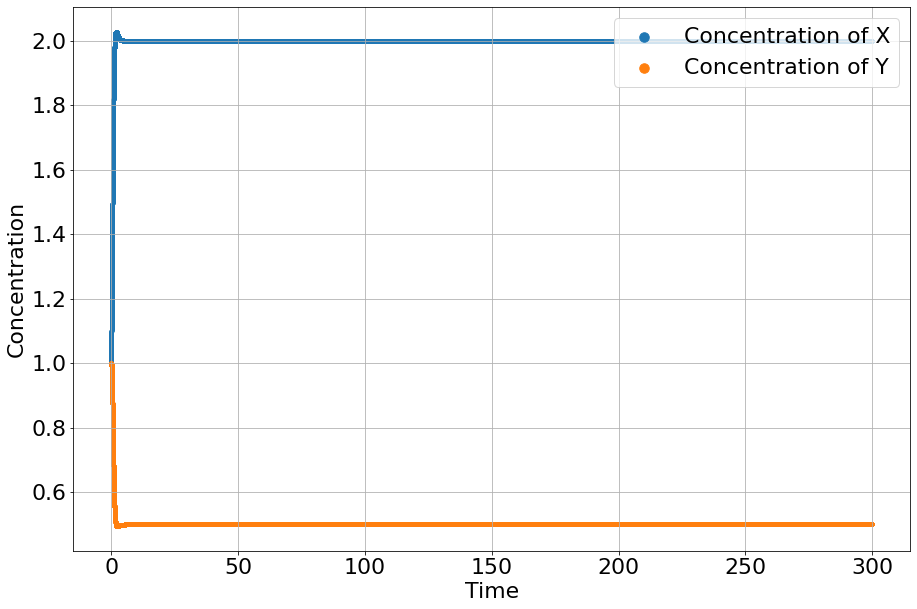

In [129]:
Euler(2,1,1,1,0.001,300000)

### Showing the small oscillations about equilibrium at later times:

In [ ]:
Euler(1,2,1,1,0.0001,800000000)
plt.xlim(79992,80000)
plt.ylim(0.999,1.001)

#x = np.array([0,8000])
y= np.array([1,1])
plt.plot(x,y,color='red',label = "Equilibrium")
plt.legend(loc = 'upper right',markerscale=3.)
plt.title ("Time vs Concentration of X ")

### Exact same algorithm as the previous one, but it plots X vs Y

In [118]:
def Euler2(A,B,x0,y0,stepsize ,steps):    #Plotting a single graph of X and Y against eachother
    xi = x0
    yi= y0
    
    dots = np.zeros((steps,3))
    dots[0,0],dots[0,1] = x0,y0
    
    for i in range (1,steps):
        xi = xi + stepsize*(A-(B+1)*xi + yi*(xi**2))
        
        yi = yi + stepsize*(B*xi - yi*xi**2)
        
        dots[i,0] ,dots[i,1],dots[i,2] = xi,yi,i*stepsize
        
    plt.scatter(dots[:,0] , dots[:,1] ,label = "X vs Y",s=10)
    plt.xlabel("Concentration of X")
    plt.ylabel("Concentration of Y")
  
    # Showing the initial conditions
    plt.scatter(x0,y0,marker = "*" , s = 125 , label = "Initial Conditions")
    
    # Clearly showing where the equilibrium point is
    plt.scatter(A,B/A,marker = "o" , s = 125 , label = "Steady State Solution",color = 'red')
    plt.legend(loc = 'best',markerscale=1. )
    plt.title("X vs Y")

    plt.grid()
    

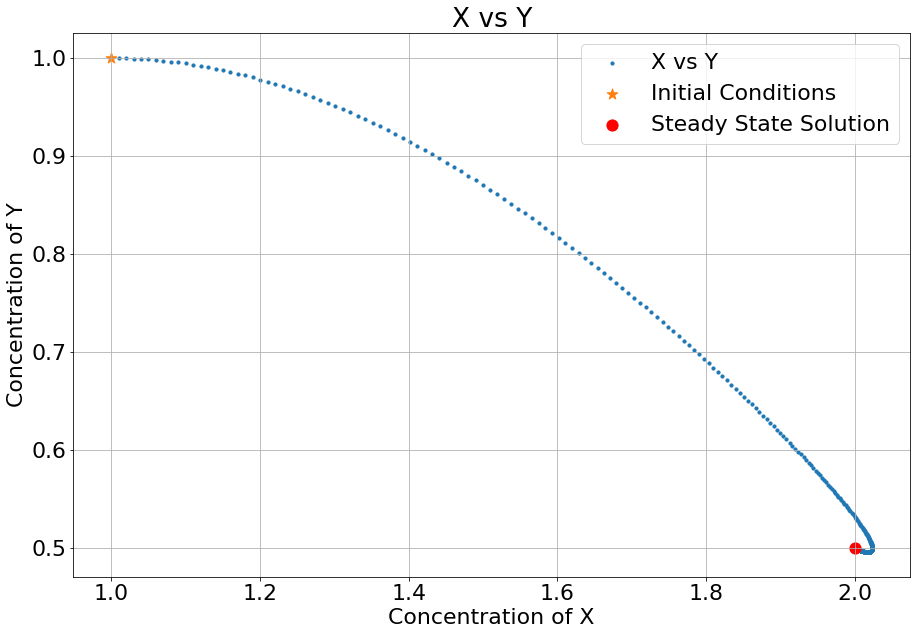

In [130]:
Euler2(2,1,1,1,0.01,40000)

### Two equivialent algortihms, one plotting X,Y vs time, for 'k' different intital conditions
### and the other plotting X vs Y ()with more graphing options 

In [120]:
def Euler_multi_XYvsT(A ,B,x0,y0,dt,dx0 ,dy0, steps , maxxk ): 
    # y0 and dx0 are the amounts that y0 and x0 will change between each successive plot
    # maxxk determines the amount of solutions we will have. For example, if maxk = 6:
    # there would be 6 plots, each with 6 different intital conditions.
    
    i=0
    k=1
    
    while k<=maxxk:             # the amount of graphs i want
        
        dots = np.zeros((steps,3))
        dots[0,0],dots[0,1] = x0+k*dx0,y0+k*dy0
        xi = x0 +k*dx0
        yi = y0 + k*dy0
    
        for i in range (1,steps):
            xi = xi + dt*(A-(B+1)*xi + yi*(xi**2))
        
            yi = yi + dt*(B*xi - yi*xi**2)
        
            dots[i,0] ,dots[i,1],dots[i,2] = xi,yi,i*dt
        
       
        #print(dots) 
        X = dots[:,0] 
        Y = dots[:,1] 
        t = dots[:,2] 
        
        plt.scatter(t,Y,label =k,s=2,color = 'red')
        plt.scatter(t,X,s=2,color = 'black')
        plt.title("Time vs Concentration")

        
        
        plt.xlabel("Time")
        plt.ylabel("Concentration")
        #plt.legend()
        plt.grid()
    
       
        xi_a = x0 + k*dx0
        
        yi_a = y0 + k*dy0
        k+=1
        plt.grid()

In [121]:
 # plotting mutiple graphs, with different initial conditions.
    
def Euler_multi_XvsY(A ,B,x0,y0,dt,dx0 ,dy0, steps , maxxk ,graph,Legend = False): 
    #yi = y0
    #xi = x0
    
    i=0
    k=1
    
    while k<=maxxk:             # the amount of graphs i want
        
        dots = np.zeros((steps,3))
        dots[0,0],dots[0,1] = x0+k*dx0,y0+k*dy0
        xi = x0 +k*dx0
        yi = y0 + k*dy0
    
        for i in range (1,steps):
            xi = xi + dt*(A-(B+1)*xi + yi*(xi**2))
        
            yi = yi + dt*(B*xi - yi*xi**2)
        
            dots[i,0] ,dots[i,1],dots[i,2] = xi,yi,i*dt
        
       
        #print(dots) 
        X = dots[:,0] 
        Y = dots[:,1] 
        t = dots[:,2] 
        
        
        
        # 0 = scatterplot, 1 = plot, 2 = Both plot, and scatterplot
        if graph == 0:
            plt.scatter(X,Y,s=5)
        elif graph == 1:           # Graphing options
            plt.plot(X,Y)
        elif graph == 2:
            plt.scatter(X,Y,s=5), plt.plot(X,Y)

        plt.scatter(X[0],Y[0],s=45) # Showing the intital Concentrations of each reaction.
        
        plt.xlabel("Concentration of X")
        plt.ylabel("Concentration of Y")
    
       
        xi_a = x0 + k*dx0
        yi_a = y0 + k*dy0
        k+=1
    
    plt.scatter(A,B/A , marker = 'x',label = 'Steady State Solution',color = 'black')
    plt.title("X vs Y")
    
    if Legend == True:
        plt.legend()
    plt.grid()

In [122]:
#Euler_multi_XYvsT(2,5,6,20,0.001,0.1,0.1,120000,150)
#plt.ylim()

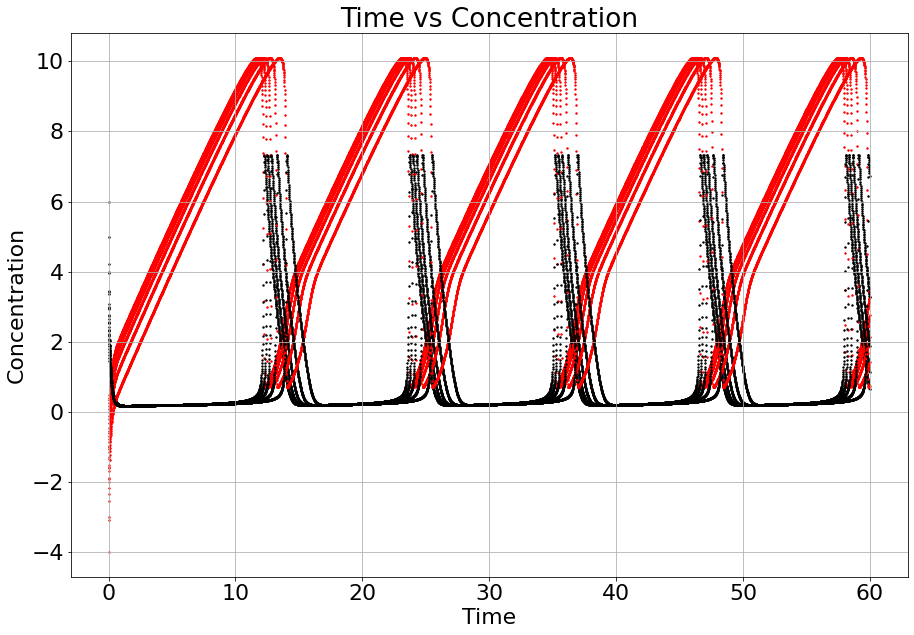

In [123]:
Euler_multi_XYvsT(1,5,1,1,0.01,1,-1,6000,5)
#plt.ylim(-10,7)
plt.grid()

### Plots, with different intital conditions

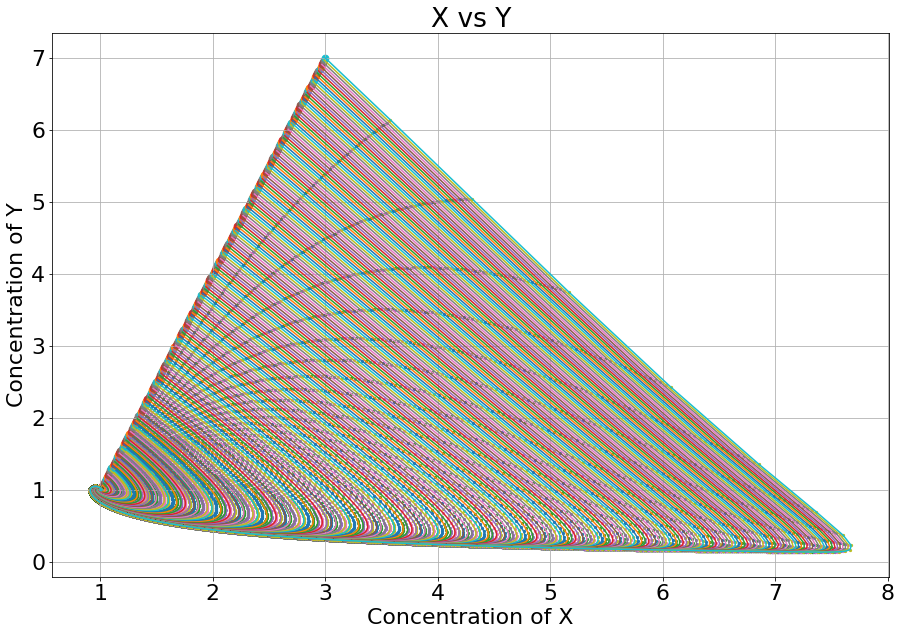

In [124]:
Euler_multi_XvsY(1,1,1,1,0.01,0.01,0.03,9000,200,2)

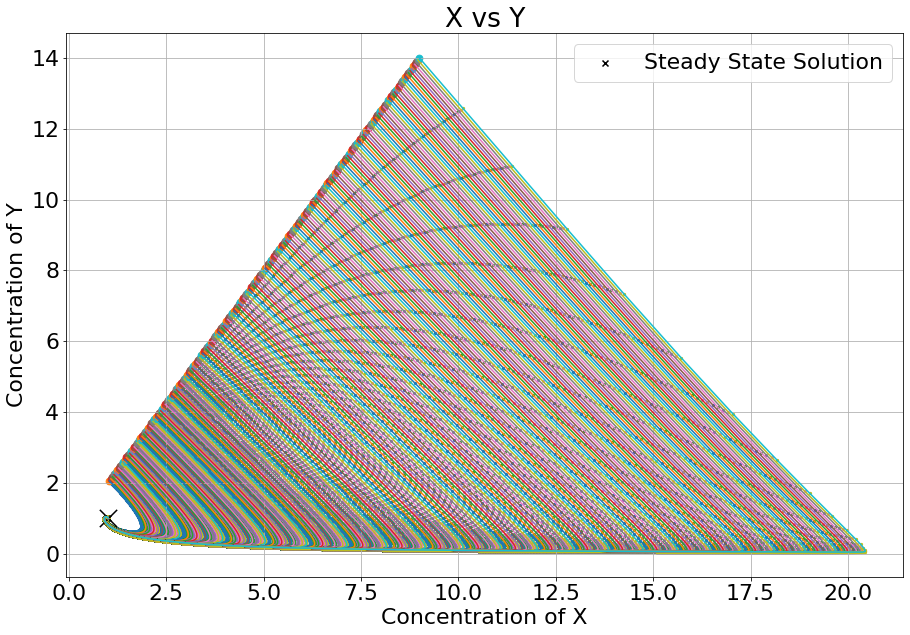

In [125]:
Euler_multi_XvsY(1,1,1,2,0.001,0.04,0.06,9000,200,2,True)
plt.scatter(1,1,marker = 'x',s=300,color = 'black')


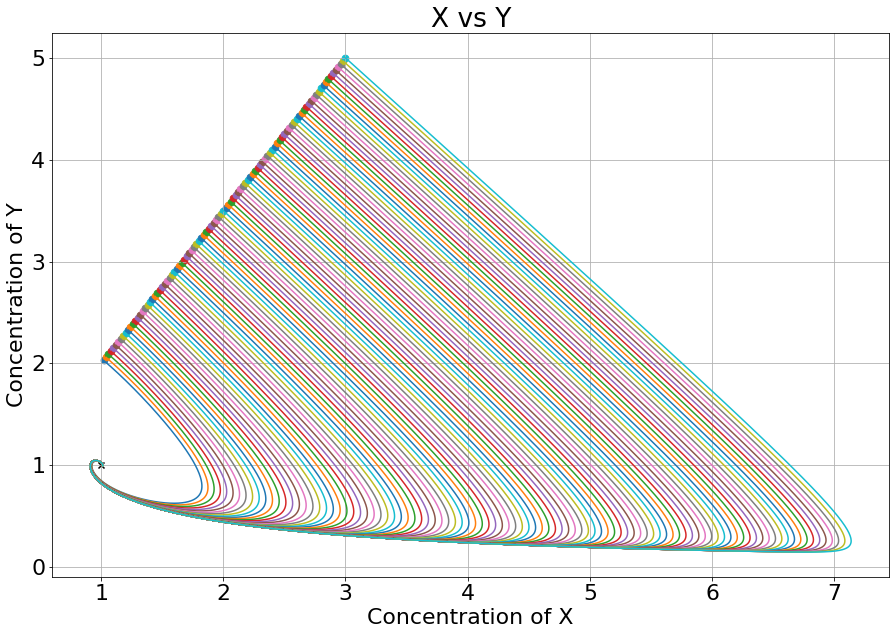

In [126]:
Euler_multi_XvsY(1,1,1,2,0.001,0.02,0.03,9000,100,1)

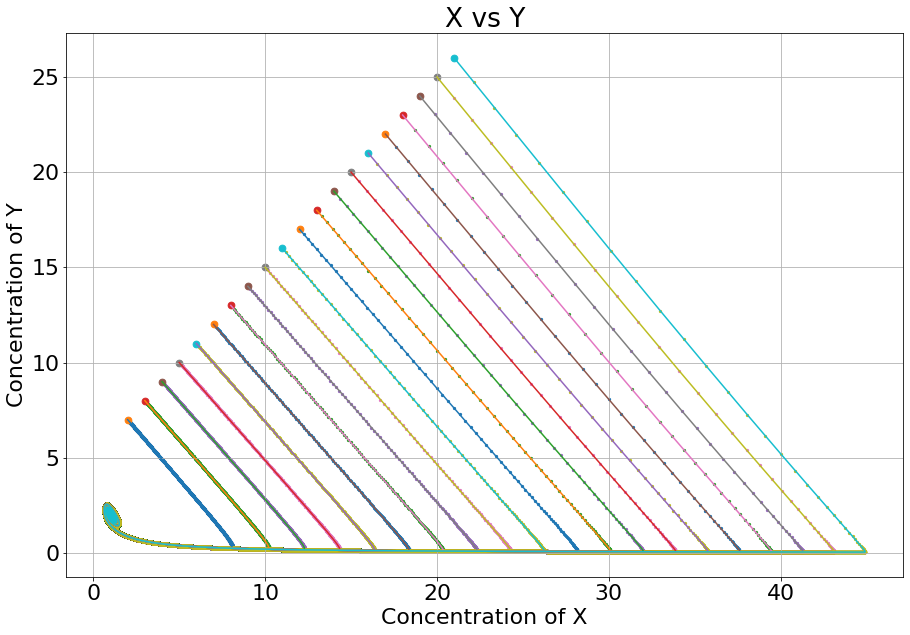

In [127]:
Euler_multi_XvsY(1,2,1,6,0.0001,1,1,2000000,20,2,)


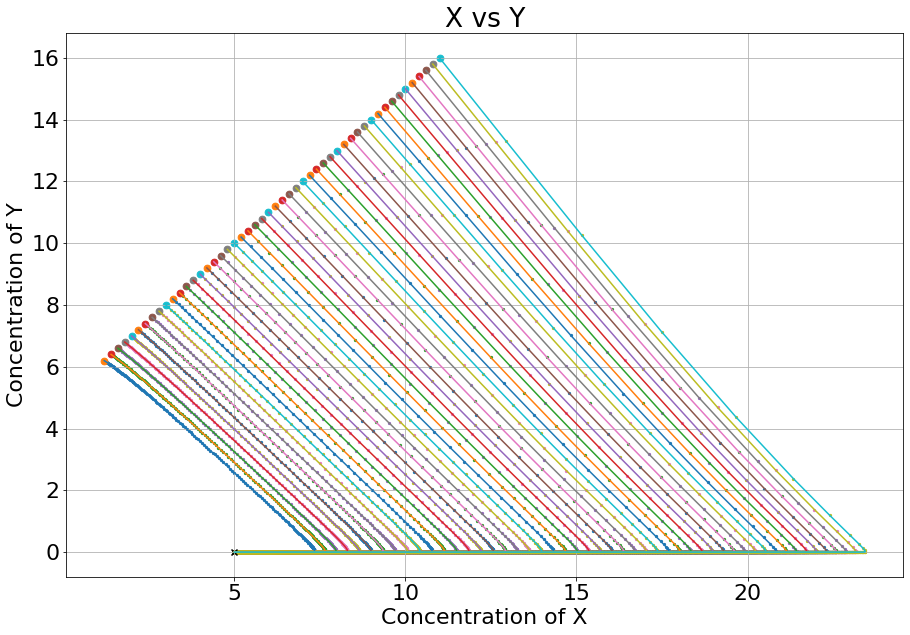

In [128]:
Euler_multi_XvsY(5,0,1,6,0.001,0.2,0.2,200000,50,2,)